## Importing Libraries

In [ ]:
!python -m pip install transformers
!python -m pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import os
from tqdm.notebook import tqdm
import re
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

plt.style.use('ggplot')
np.__version__

'1.22.4'

## Loading the data

In [ ]:
!gdown 1EgJ4xUZeNzzCMjRe4Y5c1rTsmhWLD8lL

Downloading...
From: https://drive.google.com/uc?id=1EgJ4xUZeNzzCMjRe4Y5c1rTsmhWLD8lL
To: /content/Symptom2DiseaseID.csv
100% 240k/240k [00:00<00:00, 145MB/s]


In [ ]:
df = pd.read_csv('./Symptom2DiseaseID.csv', delimiter=';')
df.head()

,indeks,label,text
0,0,Psoriasis,"Saya telah mengalami ruam kulit di lengan, ka..."
1,1,Psoriasis,"Kulit saya mengelupas, terutama di lutut, sik..."
2,2,Psoriasis,"Saya telah mengalami nyeri sendi di jari, per..."
3,3,Psoriasis,"Ada debu seperti perak di kulit saya, terutam..."
4,4,Psoriasis,Kuku saya memiliki penyok atau lubang kecil d...


In [ ]:
df.drop("indeks", axis=1, inplace=True)

In [ ]:
import itertools

for i in range(len(df["text"])):
    df["text"][i] = re.sub('  +', ' ', df["text"][i])
    df["text"][i] = ''.join(''.join(s)[:1] for _, s in itertools.groupby(df["text"][i]))
    df["text"][i] = df["text"][i].lower()
    df["label"][i] = df["label"][i].lower()

df.label = df.label.str.replace('^ +| +$', '', regex=True)

In [ ]:
for nama_kolom in df.columns:
  print(df[nama_kolom].value_counts(), "\n")

psoriasis                          50
pembuluh mekar                     50
penyakit ulkus peptikum            50
reaksi obat                        50
penyakit refluks gastroesofagus    50
alergi                             50
infeksi saluran kemih              50
malaria                            50
penyakit kuning                    50
spondylosis serviks                50
migrain                            50
hipertensi                         50
asma bronkial                      50
jerawat                            50
radang sendi                       50
wasir dimorfik                     50
radang paru-paru                   50
flu biasa                          50
infeksi jamur                      50
demam berdarah                     50
impetigo                           50
cacar air                          50
penyakit tipus                     50
diabetes                           50
Name: label, dtype: int64 

 saya merasa sangat gatal, sakit, dan lelah. selain itu, ber

Creating encodings for disease.

In [ ]:
int2label = {}

for i, disease in enumerate(df['label'].unique()):
    int2label[i] = disease

label2int = {v : k for k, v in int2label.items()}
num_classes = len(int2label)

int2label, label2int

({0: 'psoriasis',
  1: 'pembuluh mekar',
  2: 'penyakit tipus',
  3: 'cacar air',
  4: 'impetigo',
  5: 'demam berdarah',
  6: 'infeksi jamur',
  7: 'flu biasa',
  8: 'radang paru-paru',
  9: 'wasir dimorfik',
  10: 'radang sendi',
  11: 'jerawat',
  12: 'asma bronkial',
  13: 'hipertensi',
  14: 'migrain',
  15: 'spondylosis serviks',
  16: 'penyakit kuning',
  17: 'malaria',
  18: 'infeksi saluran kemih',
  19: 'alergi',
  20: 'penyakit refluks gastroesofagus',
  21: 'reaksi obat',
  22: 'penyakit ulkus peptikum',
  23: 'diabetes'},
 {'psoriasis': 0,
  'pembuluh mekar': 1,
  'penyakit tipus': 2,
  'cacar air': 3,
  'impetigo': 4,
  'demam berdarah': 5,
  'infeksi jamur': 6,
  'flu biasa': 7,
  'radang paru-paru': 8,
  'wasir dimorfik': 9,
  'radang sendi': 10,
  'jerawat': 11,
  'asma bronkial': 12,
  'hipertensi': 13,
  'migrain': 14,
  'spondylosis serviks': 15,
  'penyakit kuning': 16,
  'malaria': 17,
  'infeksi saluran kemih': 18,
  'alergi': 19,
  'penyakit refluks gastroesofag

## Data Distribution

Text(0.5, 1.0, 'Count of each disease')

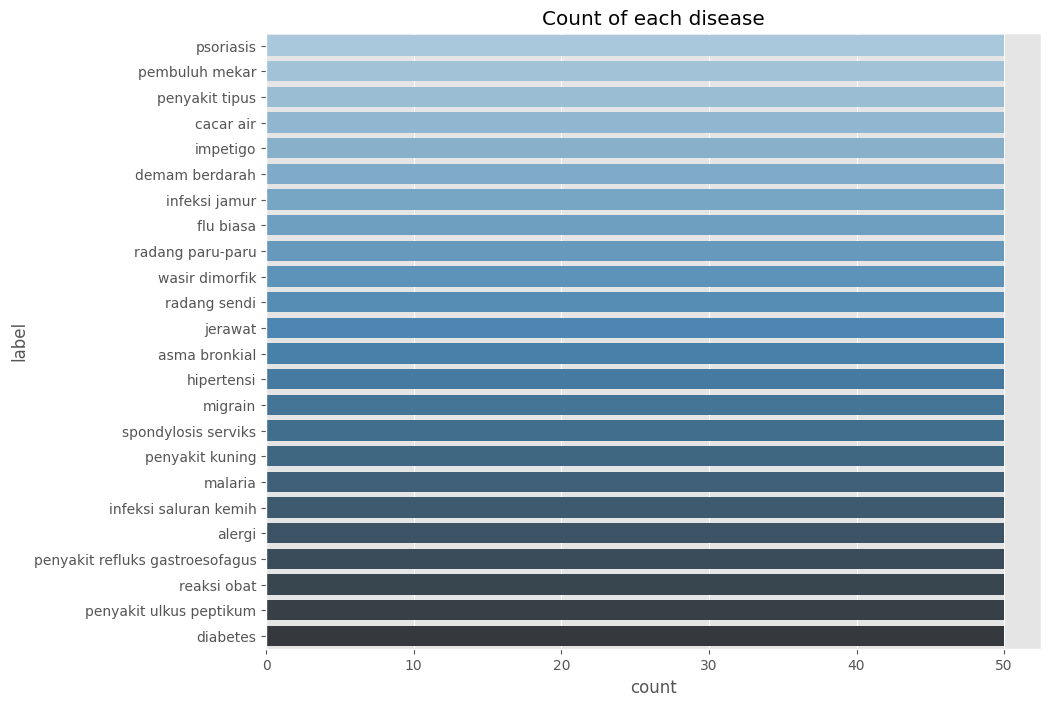

In [ ]:
plt.figure(figsize = (10, 8))

sea.countplot(y = df['label'], palette = 'Blues_d')
plt.title('Count of each disease')

## Distribution of the lenght of description

  0%|          | 0/1200 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Distribution of description length')

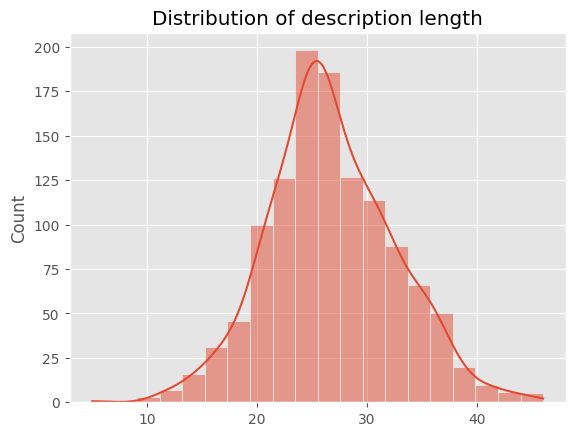

In [ ]:
length = []
for txt in tqdm(df['text'].values):
    length.append(len(txt.split()))

sea.histplot(length, kde = True, bins = 20)
plt.title('Distribution of description length')

In [ ]:
df['label'] = df['label'].map(lambda x : label2int[x])

In [ ]:
df["label"].value_counts()

0     50
1     50
22    50
21    50
20    50
19    50
18    50
17    50
16    50
15    50
14    50
13    50
12    50
11    50
10    50
9     50
8     50
7     50
6     50
5     50
4     50
3     50
2     50
23    50
Name: label, dtype: int64

In [ ]:
X, y = df['text'].values, df['label'].values

x_tokenizer = Tokenizer(filters = '')
x_tokenizer.fit_on_texts(X)
x_vocab = len(x_tokenizer.word_index) + 1
print("X vocab:", x_vocab)

X vocab: 1143


## Creating the train and testing data

In [ ]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.1, stratify = y)
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((1080,), (120,), (1080,), (120,))

## Converting the data into `tf.data.Dataset`

1. The tokenizer of pretrained bert is downloaded and used.
2. `train_dataset` and `val_dataset` is created using `tf.data.Dataset` with batch size 8.

In [ ]:
from transformers import AutoTokenizer
BATCH_SIZE = 8

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
train_encodings = tokenizer(list(train_x), padding="max_length", truncation=True)
val_encodings = tokenizer(list(val_x), padding="max_length", truncation=True)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_y
)).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_y
)).batch(BATCH_SIZE)


In [ ]:
num_classes = 24

from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(
    "bert-base-cased", 
    num_labels = num_classes, 
    id2label = int2label, 
    label2id = label2int,
    output_attentions = True)

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate = 3e-5),
    metrics = ['accuracy'])

model

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  18456     
                                                                 
Total params: 108,328,728
Trainable params: 108,328,728
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<transformers.models.bert.modeling_tf_bert.TFBertMainLayer object at 0x7f2b6a5ac9a0> True
<keras.layers.regularization.dropout.Dropout object at 0x7f2eb5a9be20> True
<keras.layers.core.dense.Dense object at 0x7f2eb5a80760> True


## Fine tuning the model

1. The model is fined tuned for 3 epochs.

In [ ]:
EPOCHS = 10
batch_size = 16

history = model.fit(train_dataset,
          batch_size=batch_size,
          epochs = EPOCHS,
          validation_data = val_dataset)

Epoch 1/10
135/135 [==============================] - 180s 972ms/step - loss: 3.0230 - accuracy: 0.1194 - val_loss: 2.5549 - val_accuracy: 0.3583
Epoch 2/10
135/135 [==============================] - 128s 947ms/step - loss: 1.9213 - accuracy: 0.5528 - val_loss: 1.3823 - val_accuracy: 0.6750
Epoch 3/10
135/135 [==============================] - 128s 946ms/step - loss: 1.0760 - accuracy: 0.7806 - val_loss: 0.8174 - val_accuracy: 0.7917
Epoch 4/10
135/135 [==============================] - 128s 949ms/step - loss: 0.5696 - accuracy: 0.8926 - val_loss: 0.5287 - val_accuracy: 0.8833
Epoch 5/10
135/135 [==============================] - 129s 957ms/step - loss: 0.3394 - accuracy: 0.9343 - val_loss: 0.3857 - val_accuracy: 0.9167
Epoch 6/10
135/135 [==============================] - 128s 949ms/step - loss: 0.2048 - accuracy: 0.9676 - val_loss: 0.4851 - val_accuracy: 0.8917
Epoch 7/10
135/135 [==============================] - 128s 947ms/step - loss: 0.1472 - accuracy: 0.9741 - val_loss: 0.2493 -

In [ ]:
model.evaluate(val_dataset, batch_size=batch_size)

15/15 [==============================] - 5s 334ms/step - loss: 0.2300 - accuracy: 0.9500


[0.23001544177532196, 0.949999988079071]

## Plotting the loss and accuracy plot.

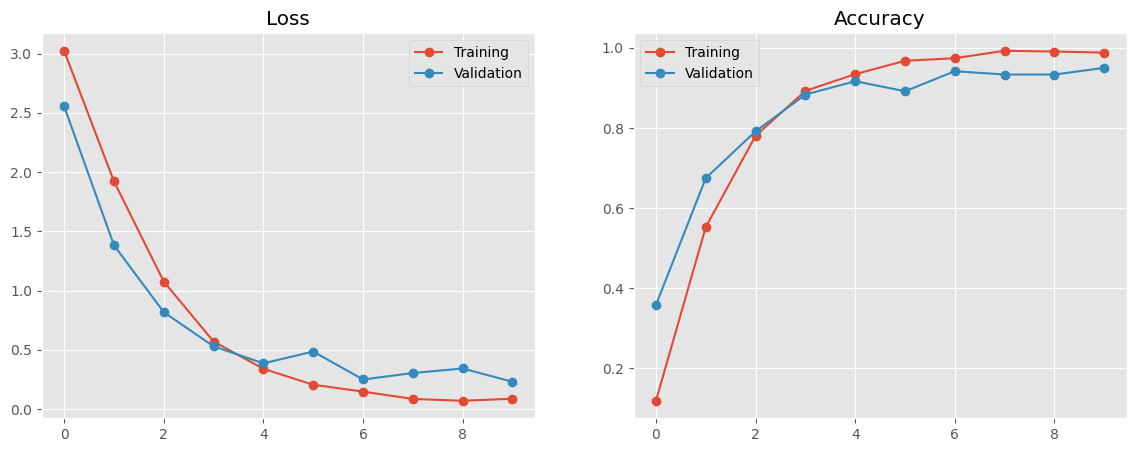

In [ ]:
plt.figure(figsize = (14, 5))

plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], marker = 'o', label = 'Training')
plt.plot(history.history['val_loss'], marker='o', label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], marker = 'o', label = 'Training')
plt.plot(history.history['val_accuracy'], marker='o', label = 'Validation')
plt.legend()


## Testing the model on custom input.

In [ ]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, top_k = num_classes)

text1 = str(" Penglihatan saya berkabut, dan tampaknya semakin memburuk. Saya merasa lelah dan lelah sepanjang waktu. Saya juga sering mengalami pusing parah dan pusing.").lower()
text2 = str("Saya mengalami sembelit dan sakit perut, dan itu sangat tidak nyaman. Sakit perut semakin parah dan mulai mempengaruhi kehidupan sehari-hari saya. Apalagi setiap malam saya menggigil, diikuti demam ringan.").lower()

pred1 = pipe(text1)
pred2 = pipe(text2)

print(pred1[0][:2])
print(pred2[0][:2])

[{'label': 'diabetes', 'score': 0.983944296836853}, {'label': 'reaksi obat', 'score': 0.0024944799952208996}]
[{'label': 'penyakit tipus', 'score': 0.9796872138977051}, {'label': 'penyakit ulkus peptikum', 'score': 0.003099726513028145}]


In [ ]:
!mkdir ./save-bert-v2

In [ ]:
model.save("save-bert-v2")

In [ ]:
!zip -r save-bert-v2.zip "./save-bert-v2/"

  adding: save-bert-v2/ (stored 0%)
  adding: save-bert-v2/saved_model.pb (deflated 92%)
  adding: save-bert-v2/fingerprint.pb (stored 0%)
  adding: save-bert-v2/assets/ (stored 0%)
  adding: save-bert-v2/keras_metadata.pb (deflated 95%)
  adding: save-bert-v2/variables/ (stored 0%)
  adding: save-bert-v2/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: save-bert-v2/variables/variables.index (deflated 79%)


In [ ]:
!ls -lh save-bert-v2.zip

-rw-r--r-- 1 root root 990M May 23 21:29 save-bert-v2.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r save-bert-v2.zip "/content/drive/My Drive/"